In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
project_path = str(Path().joinpath('..', 'triple_agent').resolve())
sys.path.append(project_path)
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.replays.get_parsed_replays import get_parsed_replays
from triple_agent.utilities.event_constants import SCL5_DROPPED_PLAYERS, SCL5_DIVISIONS, select_scl5
from triple_agent.reports.game_outcomes import game_outcomes
from triple_agent.utilities.outcomes import WinType
from triple_agent.reports.game_durations import game_durations
from triple_agent.reports.scl_set_scores import game_differential

In [4]:
def sort_by_spy_wins(data_dictionary, data_sum):
    matching = [x for c,x in data_dictionary.items() if c & WinType.SpyWin]
    if data_sum is not None:
        matching = [m/data_sum for m in matching]
    return sum(matching)

In [5]:
scl5_replays = get_parsed_replays(select_scl5)

In [6]:
placement_players = {
    "mintyrug"
    "lazybear",
    "iggythegrifter",
    "hunu",
    "Kmars133",
    "Ryooo",
    "OpiWrites",
    "Calvin Schoolidge",
    "Watermeat",
    "skrewwl00se",
    "Silverthorn",
    "furbyfubar",
    "Cartwright",
    "Hectic",
    "pofke",
    "ninjafairy",
} - SCL5_DROPPED_PLAYERS

In [7]:
placement_spy_matches = list(filter(lambda g: g.spy in placement_players, scl5_replays))
placement_sniper_matches = list(filter(lambda g: g.sniper in placement_players, scl5_replays))

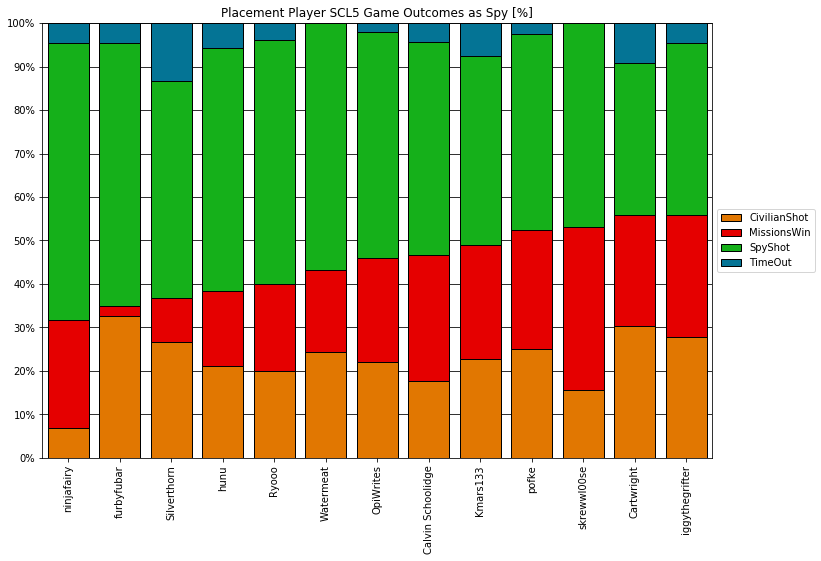

In [8]:
game_outcomes(
    placement_spy_matches,
    "Placement Player SCL5 Game Outcomes as Spy",
     groupby=lambda g: g.spy,
    category_data_order=sort_by_spy_wins,
    data_stack_order = [WinType.CivilianShot, WinType.MissionsWin, WinType.SpyShot, WinType.TimeOut],
    counts_plot=False
)

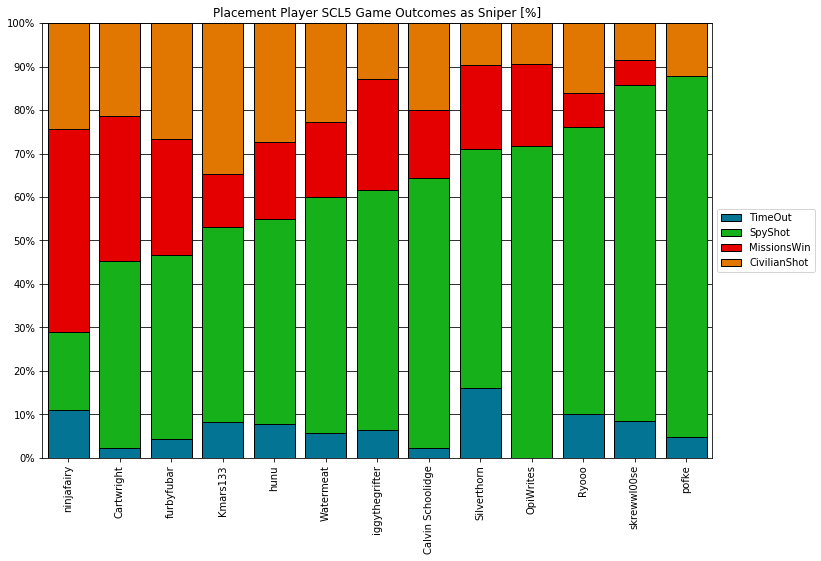

In [9]:
game_outcomes(
    placement_sniper_matches,
    "Placement Player SCL5 Game Outcomes as Sniper",
     groupby=lambda g: g.sniper,
    category_data_order=sort_by_spy_wins,
    reversed_data_sort=True,
    counts_plot=False
)